Language model evaluation

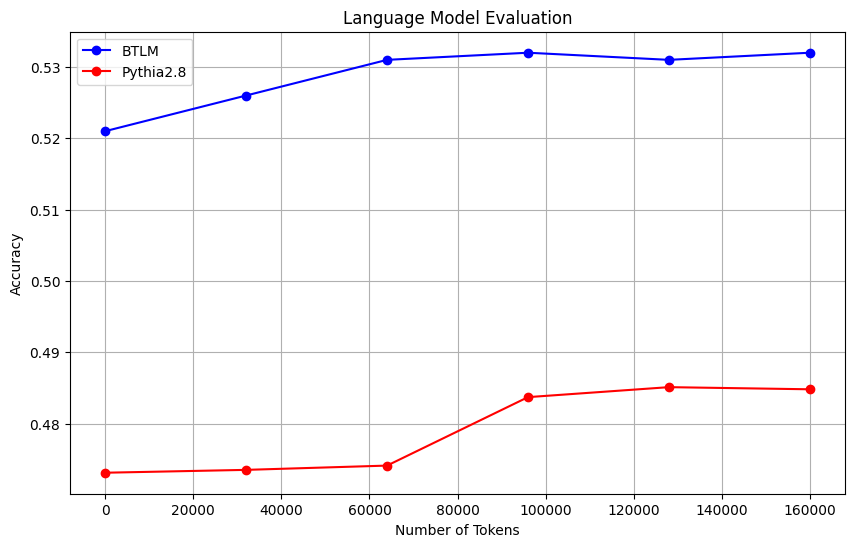

In [3]:
import matplotlib.pyplot as plt
import numpy as np

checkpoints = np.array([0, 500, 1000, 1500, 2000, 2500])

number_of_tokens = checkpoints * 64

btlm_accuracy = np.array([0.521, 0.526, 0.531, 0.532, 0.531, 0.532])
pythia_accuracy = np.array([0.4731, 0.4735 , 0.4741, 0.4837, 0.4851, 0.4848])

plt.figure(figsize=(10, 6))
plt.plot(number_of_tokens, btlm_accuracy, marker='o', color='blue', label='BTLM')
plt.plot(number_of_tokens, pythia_accuracy, marker='o', color='red', label='Pythia2.8')

plt.title('Language Model Evaluation')
plt.xlabel('Number of Tokens')
plt.ylabel('Accuracy')
plt.legend()

plt.grid(True)

plt.show()


Different precisions

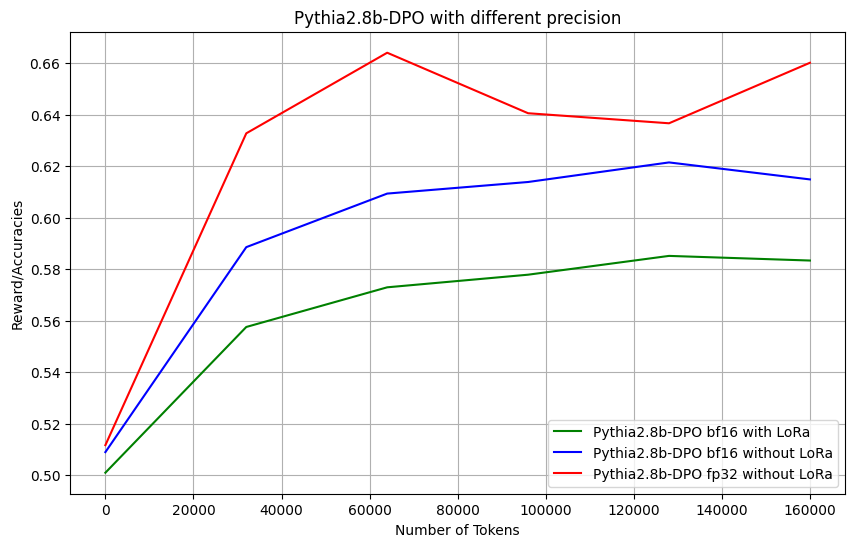

In [5]:
checkpoint_steps = np.array([0, 500, 1000, 1500, 2000, 2500])
number_of_tokens = checkpoint_steps * 64

pythia_bf16_loRa = np.array([0.501, 0.5576, 0.573, 0.5779, 0.5852, 0.5834])
pythia_bf16_noLoRa = np.array([0.509, 0.5886, 0.6094, 0.6139, 0.6215, 0.6149])
pythia_fp32_noLoRa = np.array([0.5117, 0.6328, 0.6641, 0.6406, 0.6367, 0.6602])

plt.figure(figsize=(10, 6))
plt.plot(number_of_tokens, pythia_bf16_loRa, color='green', label='Pythia2.8b-DPO bf16 with LoRa')
plt.plot(number_of_tokens, pythia_bf16_noLoRa, color='blue', label='Pythia2.8b-DPO bf16 without LoRa')
plt.plot(number_of_tokens, pythia_fp32_noLoRa, color='red', label='Pythia2.8b-DPO fp32 without LoRa')

plt.title('Pythia2.8b-DPO with different precision')
plt.xlabel('Number of Tokens')
plt.ylabel('Reward/Accuracies')
plt.legend(loc='lower right')

plt.grid(True)

plt.show()


Performance/Number of tokens

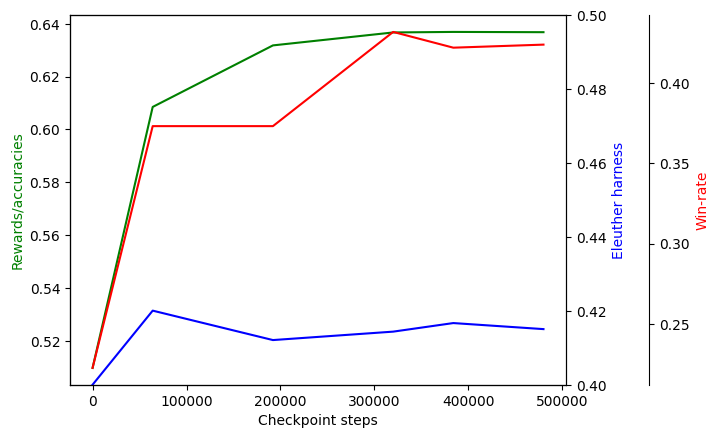

In [4]:
import matplotlib.pyplot as plt

x = [0, 1000, 3000, 5000, 6000, 7500]
accuracies = [0.5097, 0.6085, 0.6318, 0.6367, 0.6369, 0.6368]
downstream = [0.4000, 0.420045, 0.412082, 0.414364, 0.416682, 0.415045]
win_rate = [0.22265, 0.37305, 0.37305, 0.43165, 0.42185, 0.42375]

x = [x_*64 for x_ in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, accuracies, 'g-')
ax2.plot(x, downstream, 'b-')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

ax3.plot(x, win_rate, 'r-')

ax1.set_xlabel('Checkpoint steps')
ax1.set_ylabel('Rewards/accuracies', color='g')
ax2.set_ylabel('Eleuther harness', color='b')
ax3.set_ylabel('Win-rate', color='r')
ax2.set_ylim(0.4, 0.5)

plt.show()